In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

In [2]:
net = pd.read_csv('datasets\\Internet-Demographic.csv')
net

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [3]:
net.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [4]:
net['Country Name'] = net['Country Name'].astype('category')
net['Income Group'] = net['Income Group'].astype('category')

In [5]:
net.dtypes

Country Name      category
Country Code        object
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

<h1>1. Distribution of Birth rate</h1>

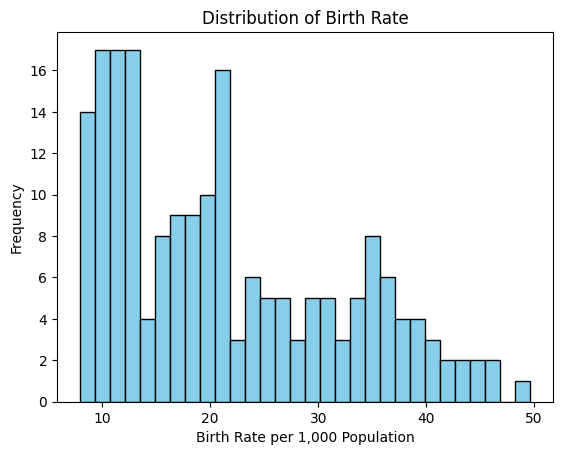

In [6]:
plt.hist(net['Birth rate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Birth Rate')
plt.xlabel('Birth Rate per 1,000 Population')
plt.ylabel('Frequency')
plt.show()

<h1>Insight 1</h1
<h3>It shows that most regions have birth rates between 10 and 20 per 1,000 population, with frequencies gradually decreasing for higher birth rates, indicating that lower birth rates are more common in areas likely associated with internet usage or development.
</h3>

<h1>2.Top 5 Countries with Highest Internet Usage</h1>

In [7]:
net['Internet users'].mean()

42.07647089194872

In [8]:
net2 = net[net['Internet users'] > 42]
net2

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
5,Argentina,ARG,17.716,59.9,High income
7,Antigua and Barbuda,ATG,16.447,63.4,High income
...,...,...,...,...,...
184,"Venezuela, RB",VEN,19.842,54.9,High income
185,Virgin Islands (U.S.),VIR,10.700,45.3,High income
186,Vietnam,VNM,15.537,43.9,Lower middle income
188,West Bank and Gaza,PSE,30.394,46.6,Lower middle income


In [9]:
net3 = net2[net2['Internet users'] > 94]
topNet = net3['Country Name']
net3

,Country Name,Country Code,Birth rate,Internet users,Income Group
22,Bermuda,BMU,10.4,95.3000,High income
47,Denmark,DNK,10.0,94.6297,High income
84,Iceland,ISL,13.4,96.5468,High income
131,Norway,NOR,11.6,95.0534,High income
163,Sweden,SWE,11.8,94.7836,High income


In [10]:
topNet

22     Bermuda
47     Denmark
84     Iceland
131     Norway
163     Sweden
Name: Country Name, dtype: category
Categories (195, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']

<h1>Insight 2</h1>
<h3>The Top 5 countries with highest internet usage are; Bermuda, Denmark, Iceland, Norway, and Sweden</h3>

<h1>3. Count of Countries by income Group</h1>

In [11]:
net['Income Group'].value_counts()

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64

<h1>Insight 3</h1>
<h3>As shown in the result above. There are 67 countries with High income, 50 countries with Lower middle income, 48 countries with Upper middle income, and 30 countries with Low income</h3>

<h1>4. Boxplot of Internet Usage</h1>

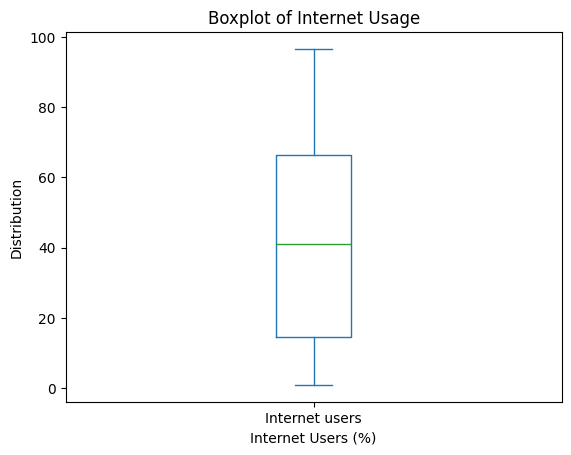

In [12]:
net['Internet users'].plot(kind='box')
plt.title('Boxplot of Internet Usage')
plt.xlabel('Internet Users (%)')
plt.ylabel('Distribution')
plt.show()

<h1>Insight 4</h1>
<h3>The boxplot reveals that the median internet usage is around 40%, with significant variation across regions, ranging from very low usage (close to 0%) to nearly universal usage (close to 100%).
</h3>

<h1>5. Countries with No Internet access</h1>

In [28]:
net['Internet users'].mean()

42.07647089194872

In [29]:
net2 = net[net['Internet users'] == 0]
net2

,Country Name,Country Code,Birth rate,Internet users,Income Group


In [45]:
countriesWithZeroInternet = net2[['Country Name']]
net2

,Country Name,Country Code,Birth rate,Internet users,Income Group


In [47]:
countriesWithZeroInternet = net2[['Country Name']].reset_index()
countriesWithZeroInternet

,index,Country Name


<h1>Insight 5</h1>
<h3>The table lists countries with 0% internet users, highlighting regions with no internet accessv</h3>

In [48]:
countriesWithZeroInternet = net2[['Country Name']].reset_index(drop=True)  
countriesWithZeroInternet

,Country Name


<h1>6.Average Birth rate</h1>

In [18]:
net['Birth rate'].mean()

21.469928205128202

In [19]:
int(net['Birth rate'].mean())

21

<h1>Insight 6</h1>
<h3>The average birth rate is 21.</h3>

<h1>7. Scatter plot: Birth rate vs Internet usage</h1>

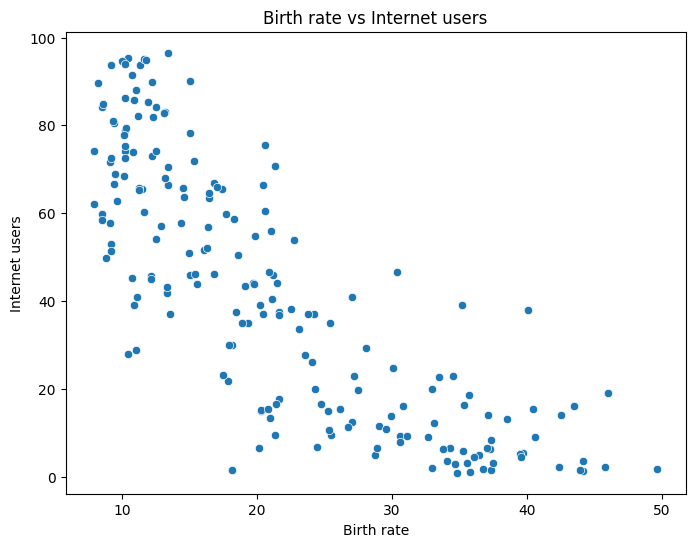

In [20]:
a = net['Birth rate']
b = net['Internet users']

data = pd.DataFrame({'Birth rate': a, 'Internet users': b})

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Birth rate', y='Internet users')
plt.title('Birth rate vs Internet users')
plt.show()

<h1>Insight 7</h1>
<h3>The scatter plot indicates a negative correlation between birth rate and internet usage; as birth rates increase, internet usage tends to decrease, suggesting that regions with higher birth rates often have lower levels of internet penetration.
</h3>

<h1>8. Countries with Birth rates above 40</h1>

In [21]:
net['Birth rate'].mean()

21.469928205128202

In [22]:
net2 = net[net['Birth rate'] > 40]
net2

,Country Name,Country Code,Birth rate,Internet users,Income Group
2,Angola,AGO,45.985,19.1,Upper middle income
11,Burundi,BDI,44.151,1.3,Low income
14,Burkina Faso,BFA,40.551,9.1,Low income
65,"Gambia, The",GMB,42.525,14.0,Low income
115,Mali,MLI,44.138,3.5,Low income
127,Niger,NER,49.661,1.7,Low income
128,Nigeria,NGA,40.045,38.0,Lower middle income
156,Somalia,SOM,43.891,1.5,Low income
167,Chad,TCD,45.745,2.3,Low income
178,Uganda,UGA,43.474,16.2,Low income


In [23]:
net3 = net2[net2['Birth rate'] > 45]
topBirthRateCountries = net3['Country Name']
net3

,Country Name,Country Code,Birth rate,Internet users,Income Group
2,Angola,AGO,45.985,19.1,Upper middle income
127,Niger,NER,49.661,1.7,Low income
167,Chad,TCD,45.745,2.3,Low income


<h1>Insight 8</h1>
<h3>The table lists the countries with birth rates above 40.</h3>

In [49]:
topBirthRateCountries.reset_index()

,index,Country Name
0,2,Angola
1,127,Niger
2,167,Chad


<h1>9.Pie chart of Income Group</h1>

In [25]:
income = net.groupby(['Income Group']).size()

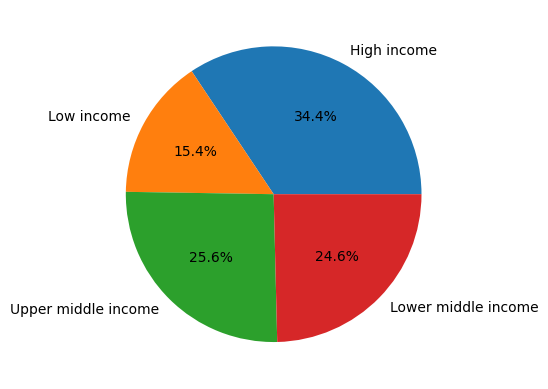

In [26]:
plt.pie(income, autopct = '%1.1f%%', labels = net['Income Group'].unique())
plt.show()

<h1>Insight 9</h1>
<h3>This shows the percentage of income group. There are ranging 34.4% in High income, 25.6% in the Upper middle income, 24.6% in Lower middle income and, 15.4% in the Low income.</h3>

<h1>10.Correlation between birth rate and Internet usage</h1>

In [50]:
net['Birth rate'].corr(net['Internet users'])

-0.8155885551284765

<h1>Insight 10</h1>
<h3>The -0.8155885551284765 shows that t here is no correlation between Birth Rate and Internet Usage.</h3>